<a href="https://colab.research.google.com/github/DARoSLab/Adv_robot_dyn_ctrl/blob/main/hw5.ipynbb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 5. Three DoF Planar Arm**

The goal of HW 5 is to create a dynamics simulation of a 3 DoF openchain system described in the figures below.


<img src="https://github.com/DARoSLab/Adv_robot_dyn_ctrl/blob/main/Figures/3DoF_Arm_Kinematics.png?raw=true" height="400">
<img src="https://github.com/DARoSLab/Adv_robot_dyn_ctrl/blob/main/Figures/3DoF_Arm_Dynamics.png?raw=true" height="400">

$\color{red}{\text{Please do not use any other Python packages except the ones we give you.}}$


In [ ]:
!pip3 install sympy matplotlib seaborn ffmpeg-python

In [ ]:
import sympy as sym
from sympy import Symbol, simplify, lambdify
from sympy.matrices.expressions import transpose
from sympy import sin, cos, Matrix
import numpy as np
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
%matplotlib inline


# Declare Symbolic Variables

In [ ]:
# Write your code: Symbolic variable definition. Complete the following variable list
[m1, m2, m3, I1, I2, I3, l1, l2, l3,  c1, c2, c3, g] =
[th1, th2, th3, dth1, dth2, dth3, ddth1, ddth2, ddth3] =
[tau1, tau2, tau3] =

# Symbolic variable groupings: No need to change
q  = Matrix([th1,  th2, th3])
dq = Matrix([dth1,  dth2, dth3])
ddq= Matrix([ddth1, ddth2, ddth3])
u  = Matrix([tau1, tau2, tau3]) # control input
z = Matrix([q.transpose(), dq.transpose()]) # state
p   = [l1, l2, l3, c1, c2, c3, m1, m2, m3, I1, I2, I3, g]  # parameters

zp_params = list(z)+list(p)
zup_params = list(z)+list(u)+list(p)

# Parameters: No need to change
m1_p = 1.5
m2_p = 1.
m3_p = 2.0
l1_p = .6
l2_p = .4
l3_p = .5
c1_p = .3
c2_p = .2
c3_p = .4
I1_p = 0.05
I2_p = 0.05
I3_p = 0.09

g_p  = 9.81
params   = [l1_p, l2_p , l3_p, c1_p, c2_p, c3_p, m1_p, m2_p, m3_p, I1_p, I2_p, I3_p, g_p]

# **Q.1. [25 pts] Kinemeatics**

Complete the function that computes the positions and velocities of the points of interest. You should identify all position and velocity (both angular and linear) variables required to compute kinetic and potential energies.

In [ ]:
# Kinemeatics
rO = Matrix([0, 0, 0])    # position of link 1
ehat1 = Matrix([cos(th1), sin(th1), 0])           # Define unit vector along Leg 1
ehat2 = Matrix([cos(th1+th2), sin(th1+th2), 0])  # Define unit vector along Leg 2
ehat3 = Matrix([cos(th1+th2+th3), sin(th1+th2+th3), 0])  # Define unit vector along Leg 2

ghat  = Matrix([0, -1 , 0])

# Write your code: Define CoM positions and link positions



# Write your code: Define linear and angular velocity of each link
# Hint: Implement and utilize 'ddt' function based on chain rule.
#       You can also use Jacobian function, lambdify function in Sympy and lambda function.



In [ ]:
# Test Forward Kinematics implementation (No need to change)
def test_forward_kinematics(params):

  test_config = [[0, 0, 0, 0, 0, 0],
                 [0, np.pi/4, np.pi/6, 0, 0, 0],
                 [np.pi/8, -0.6, 0, 0, 0, 0]]
  res = []
  soln = np.array([[[ 0, 0, 0],
           [ 0.6, 0, 0],
           [ 1., 0, 0],
           [ 1.5, 0, 0]],
        [[ 0.,          0.,          0.],
          [ 0.6,         0,         0.],
          [ 0.88284271, 0.28284271, 0.],
          [ 1.01225224, 0.76580563,  0.]],
        [[0.,          0.,          0.],
          [ 0.55432772, 0.22961006,  0.],
          [ 0.94576372, 0.14728232,  0. ],
          [ 1.43505872, 0.04437264,  0. ]]])

  for i, q in enumerate(test_config):
    xp_params = q + list(params)
    res.append(keypoints_func(*xp_params))
  res_np = np.array(res)

  assert np.allclose(soln, res_np), f'Your Forward kinematics implementation is wrong soln: {soln} != res: {res_np}'

  print('Your Forward Kinematics implementation is correct!')

In [ ]:
test_forward_kinematics(params)

Your Forward Kinematics implementation is correct!


# **Q.2. [15 pts] Kinetic and Potential Energy of Links**

Define the kinetic and potential energy of each link

In [ ]:
# Write your code: Kinetic and Potential Energy of link 1
T1 =
V1 =

# Write your code: Kinetic and Potential Energy of link 2
T2 =
V2 =

# Write your code: Kinetic and Potential Energy of link 3
T3 =
V3 =


# **Q.3. [15 pts] Lagrangian and Total Energy**

In [ ]:
# Write your code: Kinetic, Potential, and total energy of the entire system


E =

# Write your code: Lagrangian
L =

# **Q.4. [15 pts] Generalized Forces**

Define generalized force vectors using a M2Q function.

Hint: The result should be $Q = \begin{pmatrix}\tau_1 \\ \tau_2 \\ \tau_3\end{pmatrix}$.

In [ ]:
# Write your code



print(Q_tau1)
print(Q_tau2)
print(Q_tau3)

print(Q)

# Output should be
# Matrix(...)

Matrix([[tau1], [0], [0]])
Matrix([[0], [tau2], [0]])
Matrix([[0], [0], [tau3]])
Matrix([[tau1], [tau2], [tau3]])


# **Q.5. [10 pts] Equations of Motion**

Complete the equations of motion by applying Lagrange formula. Find A (Mass matrix) and b vector explained in the lecture.

In [ ]:
# Write your code: Find A and b by solving Lagrange's equation



In [ ]:
A # Note A is presented by symbols.

Matrix([
[1.0*I1 + 1.0*I2 + 1.0*I3 + 1.0*c1**2*m1 + 1.0*m2*(c2**2 + 2*c2*l1*cos(th2) + l1**2) + 1.0*m3*(c3**2 + 2*c3*l1*cos(th2 + th3) + 2*c3*l2*cos(th3) + l1**2 + 2*l1*l2*cos(th2) + l2**2), 1.0*I2 + 1.0*I3 + 1.0*c2*m2*(c2 + l1*cos(th2)) + 1.0*m3*(c3**2 + c3*l1*cos(th2 + th3) + 2*c3*l2*cos(th3) + l1*l2*cos(th2) + l2**2), 1.0*I3 + 1.0*c3*m3*(c3 + l1*cos(th2 + th3) + l2*cos(th3))],
[                                                 1.0*I2 + 1.0*I3 + 1.0*c2*m2*(c2 + l1*cos(th2)) + 1.0*m3*(c3**2 + c3*l1*cos(th2 + th3) + 2*c3*l2*cos(th3) + l1*l2*cos(th2) + l2**2),                                                         1.0*I2 + 1.0*I3 + 1.0*c2**2*m2 + 1.0*m3*(c3**2 + 2*c3*l2*cos(th3) + l2**2),                     1.0*I3 + 1.0*c3*m3*(c3 + l2*cos(th3))],
[                                                                                                                          1.0*I3 + 1.0*c3*m3*(c3 + l1*cos(th2 + th3) + l2*cos(th3)),                                                              

# **Helper Functions For Simulation**

In [ ]:
# Helper Functions: No need to change
A_func = sym.lambdify(zp_params, A)
b_func = sym.lambdify(zup_params, b)
keypoints_func = sym.lambdify(zp_params, keypoints)
kinetic_energy_func = sym.lambdify(zp_params, KE)
potential_energy_func = sym.lambdify(zp_params, PE)
E_func = sym.lambdify(zp_params, E)

# **Q.6. [10 pts] Dynamics**

Complete the dynamics function returning $\ddot{q}$ by using $A$ and $b$.

In [ ]:
def dynamics(x, params):
  u = [0, 0, 0]
  xp_params = list(x) + list(params)
  xup_params = list(x) + u + list(params)
  A_dyn = A_func(*xp_params)
  b_dyn = b_func(*xup_params)

  # Write your code: Compute joint acceleration



  return ddq

# **Perform Simulation**

In [ ]:
dt = 0.00001;
tf = 7;
num_step = int(np.floor(tf/dt));
tspan = np.linspace(0, tf, num_step);
x0 = np.array([np.pi/3, -1, 1, 0.0, 0.0, 0.0]).T;
x_out = np.zeros((6,num_step));
x_out[:,0] = x0;
keypoints_hist = []
kinetic_energy_hist = []
potential_energy_hist = []
total_energy_hist = []

for i in range(num_step-1):
    xp_params = list(x_out[:, i]) + list(params)
    keypoints_hist.append(keypoints_func(*xp_params))
    kinetic_energy_hist.append(kinetic_energy_func(*xp_params))
    potential_energy_hist.append(potential_energy_func(*xp_params))
    total_energy_hist.append(E_func(*xp_params))

    ddq = dynamics(x_out[:,i], params);
    x_out[3:,i+1] = x_out[3:,i] + ddq*dt;
    x_out[:3,i+1] = x_out[:3,i] + x_out[3:,i+1]*dt;


# **Visualize Simulation**

In [ ]:
# 3 dof arm visualization function:
def visualize_arm(keypoints_hist, dt = 0.001, num_frames=200):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)
  keypoints = keypoints_hist[0]
  link1, = ax.plot([], [], 'r', lw=15, alpha=0.3)
  link2, = ax.plot([], [], 'r', lw=15, alpha=0.3)
  link3, = ax.plot([], [], 'r', lw=15, alpha=0.3)

  txt_title = ax.set_title('')

  ax.set_xlim(( -2, 2))
  ax.set_ylim((-2, 2))
  txt_title = ax.set_title('')
  interval = len(keypoints_hist)//num_frames
  def drawFrame(k):
    k = interval*k
    keypts = keypoints_hist[k]

    x1 = keypts[0, 0]
    x2 = keypts[1, 0]
    y1 = keypts[0, 1]
    y2 = keypts[1, 1]
    link1.set_data([x1, x2], [y1, y2])
    x1 = keypts[1, 0]
    x2 = keypts[2, 0]
    y1 = keypts[1, 1]
    y2 = keypts[2, 1]
    link2.set_data([x1, x2], [y1, y2])
    x1 = keypts[2, 0]
    x2 = keypts[3, 0]
    y1 = keypts[2, 1]
    y2 = keypts[3, 1]
    link3.set_data([x1, x2], [y1, y2])
    txt_title.set_text(f't = {dt*k:.2f} sec')
    return link1, link2, link3
  anim = animation.FuncAnimation(fig, drawFrame, frames=num_frames, interval=interval, blit=True)
  return anim

In [ ]:
anim = visualize_arm(keypoints_hist, dt = dt, num_frames=200)
plt.close()
HTML(anim.to_html5_video())

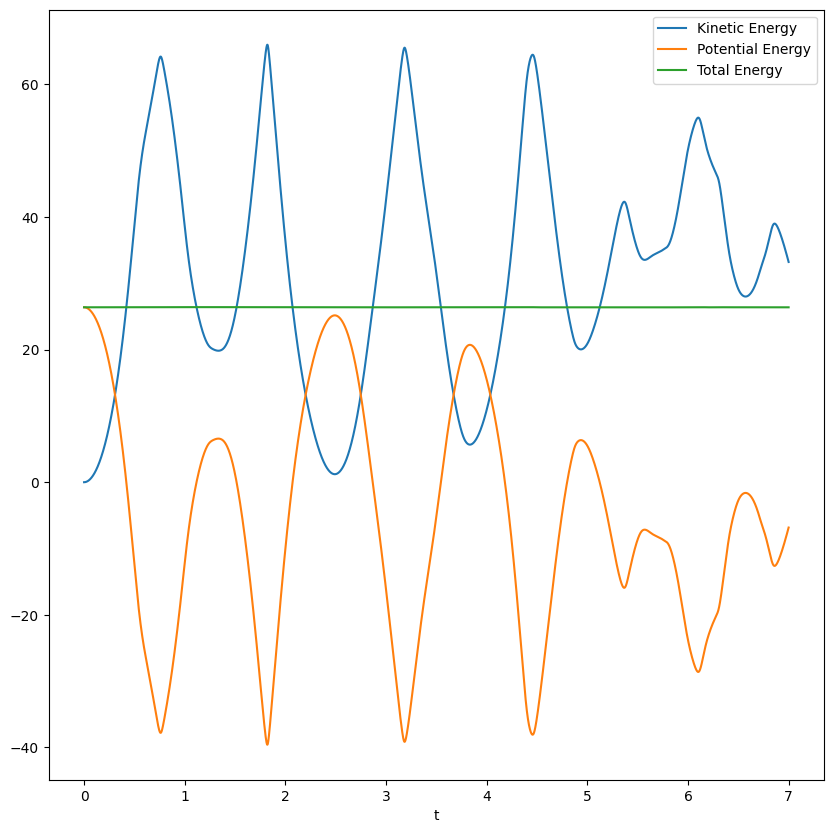

In [ ]:
# Plot Kinetic Energy, Potential Energy and Total Energy
kinetic_energy_hist_np = np.array(kinetic_energy_hist)
potential_energy_hist_np = np.array(potential_energy_hist)
total_energy_hist_np = np.array(total_energy_hist).reshape(-1)
ts = np.arange(0, tf-dt, dt)
fig= plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax.plot(ts, kinetic_energy_hist_np, label='Kinetic Energy')
ax.plot(ts, potential_energy_hist_np, label='Potential Energy')
ax.plot(ts, total_energy_hist_np, label='Total Energy')
ax.legend()
ax.set_xlabel('t')
plt.show()

# **Q.7. [10 pts] Explain why the total energy of the arm changes over time.**
Try different time steps other than 0.001 sec to show how the simulation accuracy differs total energy graph.

Please add and compare at least two graphs here to show the differences.